#### Loading the Dataset
Dataset of 34 images each showing the face of the same person yet having different facial expression.

In [ ]:
!wget https://www.dropbox.com/s/d2xv8wses9apb64/images.zip
!unzip images.zip
!rm images.zip

--2021-04-07 22:23:28--  https://www.dropbox.com/s/d2xv8wses9apb64/images.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d2xv8wses9apb64/images.zip [following]
--2021-04-07 22:23:28--  https://www.dropbox.com/s/raw/d2xv8wses9apb64/images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf52230b6f4065c487768f82ea3.dl.dropboxusercontent.com/cd/0/inline/BMNvEAkj4M619fbKvN-RL75Fc8KLPE0PQTqtsM3KxVR56ydOQjY8z68oGI0r5lEbIaZgB8rsZSTcCoDZC3uyDbzz0fTWb8wARjNPeXRK-C1jZrcZW2REwCIyAnIWtb3UqgNpFbPyjbnf09M9KrqQdNx6/file# [following]
--2021-04-07 22:23:28--  https://ucf52230b6f4065c487768f82ea3.dl.dropboxusercontent.com/cd/0/inline/BMNvEAkj4M619fbKvN-RL75Fc8KLPE0PQTqtsM3KxVR56ydOQjY8z68oGI0r5lEbIaZgB8rsZSTcCoDZC3uyDbzz0fTWb8wA

#### Show an example of the photos


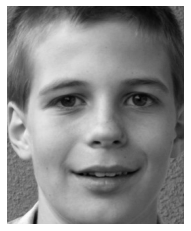

Image size: (321, 261)


In [ ]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread('images/Jara06.png', cv2.IMREAD_GRAYSCALE)

# Show image
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

print("Image size:", image.shape)

Load the photos , convert to numpy and reshape

In [ ]:
import os
import cv2
import os

path= 'images/'
images = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename),0)
    images.append(img) 

images = np.array(images)
images= images.reshape(34,83781)
images.shape

(34, 83781)

Do PCA to select  4 images

In [ ]:
from sklearn.decomposition import PCA

X = images.T
sklearn_pca = PCA(n_components=4)
X_new = sklearn_pca.fit_transform(X).T

X_new.shape

(4, 83781)

Show the chosen 4 images

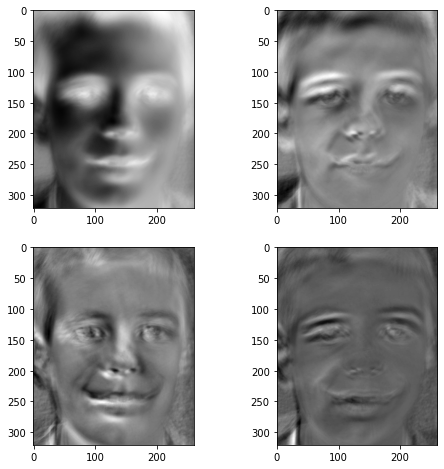

In [ ]:
X_new=X_new.reshape(4,321,261)

fig=plt.figure(figsize=(8, 8))
j = 0
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    plt.imshow(X_new[j],cmap='gray')
    j+=1
plt.show()

Reconstruct the original images

In [ ]:
from sklearn.decomposition import PCA

sklearn_pca.fit(X)
original_im = sklearn_pca.inverse_transform(X_new.T).T 
print(original_im.shape)




(34, 321, 261)


Show the reconstructed images 

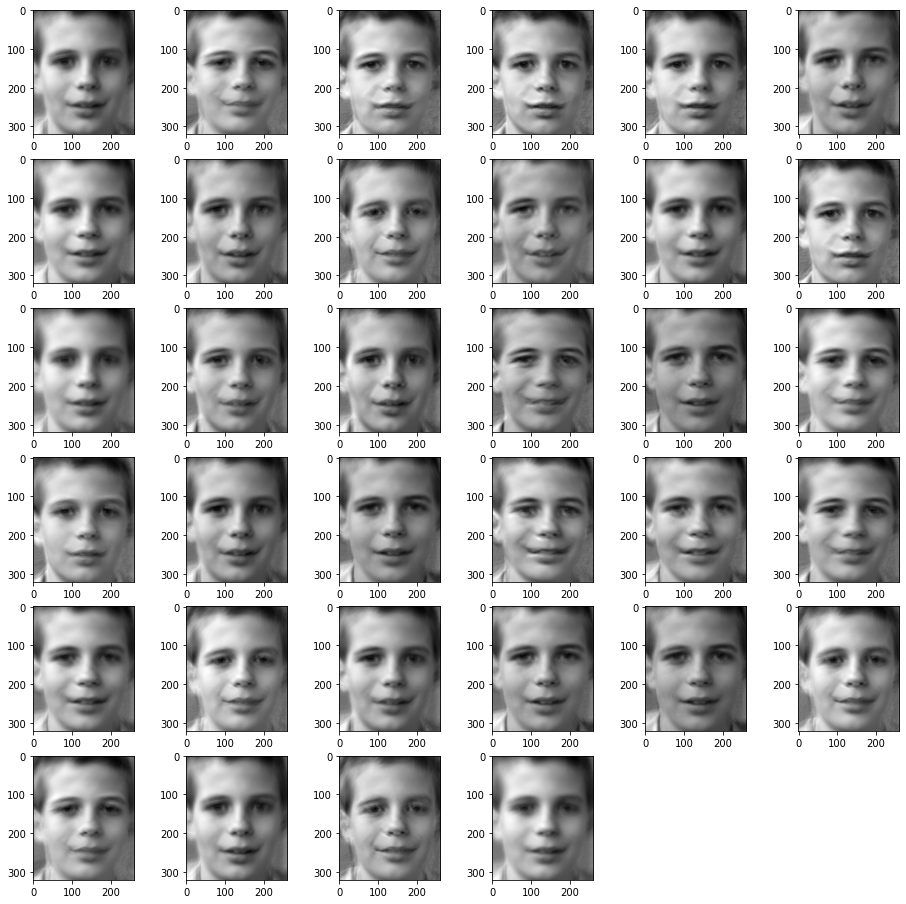

In [ ]:
original_im=original_im.reshape(34,321,261)

fig=plt.figure(figsize=(16, 16))
j = 0
for i in range(1, 35):
    fig.add_subplot(6, 6, i)
    plt.imshow(original_im[j],cmap='gray')
    j+=1
plt.show()